In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as pexp
import pickle

In [3]:
df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.shape

(5110, 12)

In [7]:
df=df[["age","heart_disease","bmi","smoking_status","stroke"]]

In [8]:
df

,age,heart_disease,bmi,smoking_status,stroke
0,67.0,1,36.6,formerly smoked,1
1,61.0,0,NaN,never smoked,1
2,80.0,1,32.5,never smoked,1
3,49.0,0,34.4,smokes,1
4,79.0,0,24.0,never smoked,1
...,...,...,...,...,...
5105,80.0,0,NaN,never smoked,0
5106,81.0,0,40.0,never smoked,0
5107,35.0,0,30.6,never smoked,0
5108,51.0,0,25.6,formerly smoked,0


In [9]:
df.isnull().sum()

age                 0
heart_disease       0
bmi               201
smoking_status      0
stroke              0
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

age               0
heart_disease     0
bmi               0
smoking_status    0
stroke            0
dtype: int64

In [12]:
df.shape

(4909, 5)

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [14]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.33, random_state=42)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


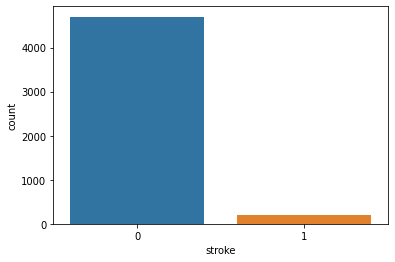

In [15]:
sns.countplot(df.stroke)
plt.show()

In [16]:
df

,age,heart_disease,bmi,smoking_status,stroke
0,67.0,1,36.6,formerly smoked,1
2,80.0,1,32.5,never smoked,1
3,49.0,0,34.4,smokes,1
4,79.0,0,24.0,never smoked,1
5,81.0,0,29.0,formerly smoked,1
...,...,...,...,...,...
5104,13.0,0,18.6,Unknown,0
5106,81.0,0,40.0,never smoked,0
5107,35.0,0,30.6,never smoked,0
5108,51.0,0,25.6,formerly smoked,0


In [17]:
df.loc[df["smoking_status"]=="Unknown"]
df["smoking_status"].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
smoke=LabelEncoder()
df["smoking_status"]=smoke.fit_transform(df["smoking_status"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df["smoking_status"].unique()

array([1, 2, 3, 0])

In [21]:
df

,age,heart_disease,bmi,smoking_status,stroke
0,67.0,1,36.6,1,1
2,80.0,1,32.5,2,1
3,49.0,0,34.4,3,1
4,79.0,0,24.0,2,1
5,81.0,0,29.0,1,1
...,...,...,...,...,...
5104,13.0,0,18.6,0,0
5106,81.0,0,40.0,2,0
5107,35.0,0,30.6,2,0
5108,51.0,0,25.6,1,0


In [22]:
X=df.drop("stroke",axis=1)

In [23]:
X

,age,heart_disease,bmi,smoking_status
0,67.0,1,36.6,1
2,80.0,1,32.5,2
3,49.0,0,34.4,3
4,79.0,0,24.0,2
5,81.0,0,29.0,1
...,...,...,...,...
5104,13.0,0,18.6,0
5106,81.0,0,40.0,2
5107,35.0,0,30.6,2
5108,51.0,0,25.6,1


In [24]:
Y=pd.DataFrame(Y)


In [25]:
Y

,stroke
0,1
2,1
3,1
4,1
5,1
...,...
5104,0
5106,0
5107,0
5108,0


In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [27]:
clf

DecisionTreeClassifier()

In [28]:
clf.score(X,Y)*100

99.73518028111631

In [29]:
clf.predict([[67,1,36.6,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [30]:
df

,age,heart_disease,bmi,smoking_status,stroke
0,67.0,1,36.6,1,1
2,80.0,1,32.5,2,1
3,49.0,0,34.4,3,1
4,79.0,0,24.0,2,1
5,81.0,0,29.0,1,1
...,...,...,...,...,...
5104,13.0,0,18.6,0,0
5106,81.0,0,40.0,2,0
5107,35.0,0,30.6,2,0
5108,51.0,0,25.6,1,0


In [31]:
data={'model':clf,'age':df['age'],'heart_disease':df['heart_disease'],'bmi':df['bmi'],'smoking_status':smoke}

In [32]:
with open('stroke.pkl','wb') as model:
  pickle.dump(data,model)

In [33]:
with open('stroke.pkl','rb') as model:
  data=pickle.load(model)
clf=data['model']
smoke=data['smoking_status']
age=data['age']
heart_d=data['heart_disease']
bmi=data['bmi']

In [34]:
y_pred=clf.predict(X)

In [35]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])